In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
path = 'D:\\uni\\2курс\ПЗМН\ML_labs\lab2\data.csv'
df = pd.read_csv(path)
df.head()

,# New York (Central Park),New York January Average Temperature
0,# Units: Degrees Fahrenheit,NaN
1,# Missing: -99,NaN
2,Date,Value
3,189501,27.6
4,189601,27


In [3]:
df = df.drop(df.head(3).index)
df = df.reset_index(drop=True)

df = df.rename(columns={
    "#  New York (Central Park)": "Year",
    " New York January Average Temperature": "Temperature"
})

df.Year = df.Year.astype('int')
df.Temperature = df.Temperature.astype('float')

df["Year"] = df.Year.floordiv(100)

In [4]:
df.head()

,Year,Temperature
0,1895,27.6
1,1896,27.0
2,1897,27.8
3,1898,32.4
4,1899,28.4


In [5]:
df.tail()

,Year,Temperature
125,2020,39.2
126,2021,34.8
127,2022,30.4
128,2023,43.5
129,2024,37.0


In [6]:
df.Temperature.describe()

count    130.000000
mean      31.298462
std        4.665991
min       19.900000
25%       28.100000
50%       31.200000
75%       34.275000
max       43.500000
Name: Temperature, dtype: float64

In [7]:
df.isna().sum()

Year           0
Temperature    0
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.Year.values.reshape(-1, 1), df.Temperature.values, random_state=11)

In [10]:
X_train.shape

(97, 1)

In [11]:
X_test.shape

(33, 1)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
coef = lin_reg.coef_
print(coef)

[0.03845896]


In [18]:
intercpt = lin_reg.intercept_
print(intercpt)

-44.18012490733929


In [19]:
predicted = lin_reg.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 28.70, expected: 27.60
predicted: 31.20, expected: 32.70
predicted: 31.66, expected: 33.80
predicted: 32.97, expected: 40.90
predicted: 33.28, expected: 28.70
predicted: 32.74, expected: 31.30
predicted: 29.55, expected: 31.10


In [20]:
predict = (lambda x: coef*x + intercpt)

predict(2019)

array([33.46852424])

In [25]:
predict(1900)

array([28.89190747])

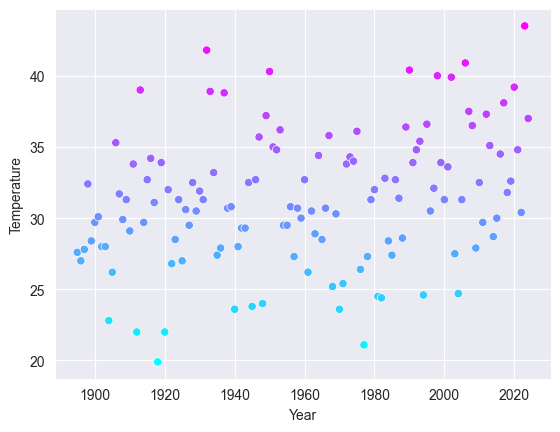

In [27]:
axes = sns.scatterplot(data=df, x='Year', y='Temperature', hue='Temperature', palette='cool', legend=False)

In [32]:
x = np.array([min(df.Year.values), max(df.Year.values)])
y = predict(x)

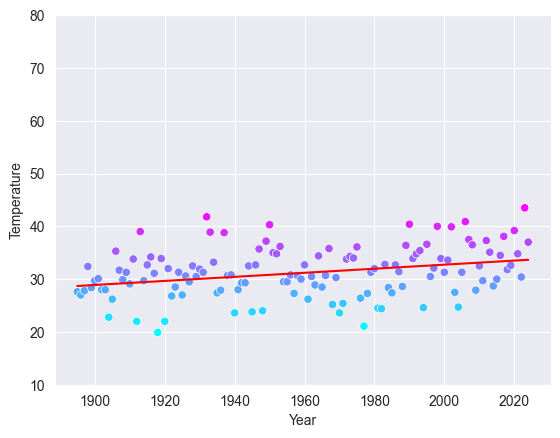

In [37]:
axes = sns.scatterplot(data=df, x='Year', y='Temperature', hue='Temperature', palette='cool', legend=False).set_ylim(10, 80)
line = plt.plot(x, y, color='r')
plt.show()